<div style="text-align:center">Marco Seiz, Andreas Prahs, Anastasia August<br>
KIT, Institut für Angewandte Materialien (IAM)<br>
Mikrostrukturmodellierung und Simulation (MMS)
</div>
<h1>Mikrostruktursimulation <br/>Rechnerübung Grundlagen Mathematik WS 22/23</h1>

In dieser Rechnerübung sollen die Erkenntnisse aus der schriftlichen Übung mit Hilfe von Python vertieft und angewendet werden. Hierzu werden Ihnen Codefragmente zur Verfügung gestellt, die Sie vervollständigen sollen.
Falls Sie keine eigene Pythonumgebung aufsetzen können, so senden Sie eine kurze Mail an den Übungsleiter (marco.seiz@kit.edu) und Sie werden Zugang zu einer entsprechenden Umgebung erhalten.

Einzelne Zellen wie die nächste können mit Shift+Enter ausgeführt werden. Während der Ausführung wird links von der Zelle ein `[*]` angezeigt, um die aktuelle Bearbeitung zu verdeutlichen, und nach Ausführung wird eine Zahl zwischen den Klammern stehen, welche zur Kennzeichnung der Reihenfolge der Ausführung dient. 
Die Befehle in der nächsten Zeile dienen dazu die nötigen Bibliotheken für die Übung einzubinden. Danach beginnt die eigentliche Übung.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['figure.figsize'] = (9,6)
mpl.rcParams['axes.grid'] = True
from sympy import *
import time
from numba import jit
import numba
import warnings
warnings.filterwarnings('ignore')
init_printing()
dtes = 0.5
dtis = [0.5, 10, 100]
runtime_expl = {dtes :  []}
runtime_expl_jit = {dtes :  []}
runtime_impl = {}
for dti in dtis:
    runtime_impl[dti] = []

<h3>Aufgabe 1 a)<br>
Analytische Lösung</h3>

Gegeben ist die Funktion $f = \exp(2x+1)$. Definieren Sie diese Funktion und bestimmen Sie die analytische Ableitung mit Hilfe von sympy. Geben Sie den Wert der Ableitung an der Stelle $x=1$ in symbolischer wie auch numerischer Form an.

Hinweis: Die Ableitung einer Funktion $f(x)$ nach $x$ lässt sich mit `diff(f(x), x)` bestimmen. Mit `N(ausdruck)` wird der Ausdruck numerisch ausgewertet.

In [2]:
x = symbols('x') 
x_pos = 1 
#hier f mit Lambda(x, expr) definieren, damit direkt als Funktion aufrufbar
f = Lambda(x, \
           exp(2*x+1))  
display(f)
df = \
Lambda(x, diff(f(x),x)) 
display(df)
symb = \
df(x_pos) 
print("Symbolische Berechnung: %s" % (symb))
display(symb)
evaluated = \
N(symb)  
print("Numerische Berechnung: %e" % (evaluated))

Symbolische Berechnung: 2*exp(3)


Numerische Berechnung: 4.017107e+01


<h3>Aufgabe 1 b)<br>
Numerische Differentiation</h3>

Es sollen nun mehrere numerische Verfahren zur Näherung der Ableitung untersucht werden. Die Verfahren basieren darauf, die Steigung der Funktion über Stützpunkte zu bestimmen.

Implementieren Sie die folgenden Verfahren in den vordefinierten Funktionen und berechnen sie wiederum die Ableitung
an der Stelle $x=1$ für jedes Verfahren. Der Wert hinter `return` wird von der Funktion zurückgegeben.

1. Rückwärtsdifferenz 1. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}}$$
2. Vorwärtsdifferenz 1. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i}}$$
3. Zentrale Differenz 2. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$$
4. Rückwärtsdifferenz 3. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{11 f(x_{i})- 18 f(x_{i-1}) + 9 f(x_{i-2}) -2 f(x_{i-3})}{3(x_{i+1}-x_{i-1})}$$
5. Zentrale Differenz 4. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{-f(x_{i+2}) + 8 f(x_{i+1}) - 8 f(x_{i-1}) +f(x_{i-2})}{6(x_{i+1}-x_{i-1})}$$

In [3]:
dx = 1.0/100.0
def diff_rueck_1_ordn(dx):
    return \
    (f(x_pos) - f(x_pos-dx))/dx 
    # (f.subs(x, x_pos) - f.subs(x, x_pos-dx) /dx # alternativ ohne Lambda 
print("Rückwärtsdifferenz %e"%N(diff_rueck_1_ordn(dx)))

Rückwärtsdifferenz 3.977203e+01


In [4]:
def diff_vor_1_ordn(dx):
    return \
(f(x_pos+dx) - f(x_pos))/dx 
print("Vorwärtsdifferenz %e"%N(diff_vor_1_ordn(dx)))

Vorwärtsdifferenz 4.057548e+01


In [5]:
def diff_zentral_2_ordn(dx):
    return \
(f(x_pos+dx)-f(x_pos-dx))/(2*dx) 
print("Zentraldifferenz 2. Ordnung %e"%N(diff_zentral_2_ordn(dx)))

Zentraldifferenz 2. Ordnung 4.017375e+01


In [6]:
def diff_rueck_3_ordn(dx):
    return \
(11*f(x_pos)-18*f(x_pos-dx)+9*f(x_pos-2*dx)-2*f(x_pos-3*dx))/(6*dx) 
print("Rückwärtsdifferenz 3. Ordnung %e"%N(diff_rueck_3_ordn(dx)))

Rückwärtsdifferenz 3. Ordnung 4.017100e+01


In [7]:
def diff_zentral_4_ordn(dx):
    return \
(-f(x_pos+2*dx)+8*f(x_pos+dx)-8*f(x_pos-dx)+f(x_pos-2*dx))/(12*dx) 
print("Zentraldifferenz 4. Ordnung %e"%N(diff_zentral_4_ordn(dx)))

Zentraldifferenz 4. Ordnung 4.017107e+01


<h3>Aufgabe 1 c)<br>
Fehlerordnung</h3>
Vervollständigen Sie die <b>err</b> Funktion so, dass diese die Differenz $|f'-f'_{\text{num}}|$ zwischen der analytischen $f'$ und dem numerischen Verfahren $f'_{\text{num}}$ zurückliefert. Füllen Sie das Array <b>k</b> mit den Werten $2^{-i}$, wobei $i$ den Index des Arrays darstellt.

Visualisieren Sie nun die numerischen Fehler und diskutieren Sie die Ergebnisse im Kontext der Größe des Fehlers und der Fehlerordnung. Was sagt die Steigung im Diagramm aus? Wie sieht es ohne doppellogarithmitsche Auftragung aus? Hinweis: In der Visualisierung kann mit dem leeren Rechteck gezoomt werden.

Tendenziell sind Verfahren höherer Ordnung genauer als Verfahren kleinerer Ordnung; für große Schrittweiten muss dies nicht mehr gegeben sein. 

Weiterhin entspricht die Steigung der Ordnung des Verfahrens in doppellogarithmischer Auftragung. Entsprechend  ist ein Potenzgesetz nach Reinzoomen in linearer Darstellung sichtbar. 

<IPython.core.display.Javascript object>


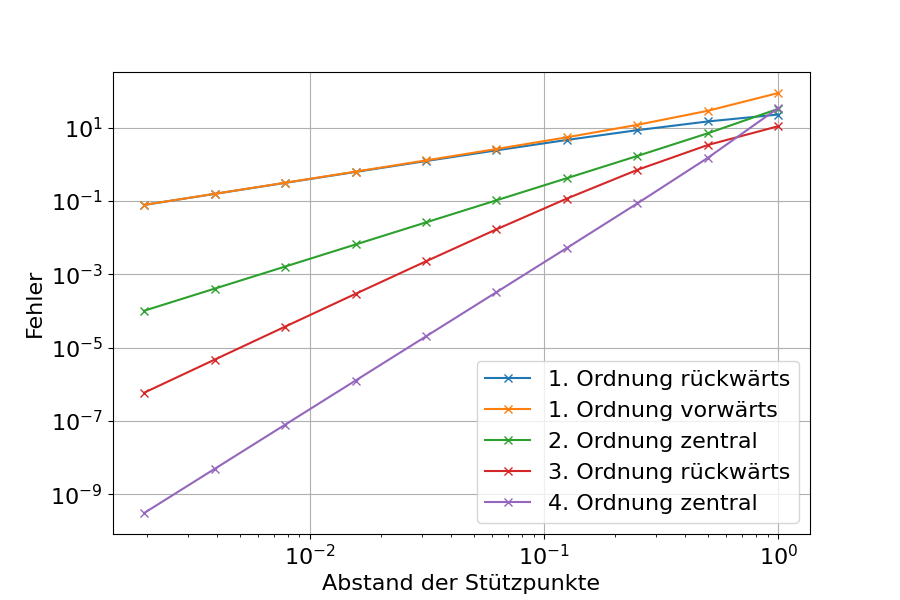

In [8]:
K = 10
err = np.zeros(K)


# Fehlerfunktion
def err(calc_method, dx):
    ret = \
    abs( N(calc_method(dx) - df(1)) )    
    return ret

# Abstand der Gitterpunkte
k = np.zeros(K)
for i in range(0,K):   
    k[i] = 2**(-i)     
#k = [2**(-i) for i in range(0,len(k))] #alternativ 



fig_dxErr, ax_dxErr = plt.subplots()

# Setze beide Skalen zu logarithmischen Skalen
ax_dxErr.set_yscale('log')
ax_dxErr.set_xscale('log')
ax_dxErr.set_xlabel("Abstand der Stützpunkte")
ax_dxErr.set_ylabel("Fehler")
ax_dxErr.plot(k,[err(diff_rueck_1_ordn,i) for i in k],"-x", label='1. Ordnung rückwärts')
ax_dxErr.plot(k,[err(diff_vor_1_ordn,i) for i in k],"-x", label='1. Ordnung vorwärts')
ax_dxErr.plot(k,[err(diff_zentral_2_ordn,i) for i in k],"-x", label='2. Ordnung zentral')
ax_dxErr.plot(k,[err(diff_rueck_3_ordn,i) for i in k],"-x", label='3. Ordnung rückwärts')
ax_dxErr.plot(k,[err(diff_zentral_4_ordn,i) for i in k],"-x", label='4. Ordnung zentral')
ax_dxErr.legend(ncol=1);

<h3>Aufgabe 2</h3>

Gegeben ist die eindimensionale Diffusionsgleichung
$$ \frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2}.$$
Diese Gleichung soll nun numerisch mit verschiedenen Verfahren gelöst werden. Der Wert der Diffusionskonstanten $D$ beträgt 1, die Raumschrittweite $\Delta x$ sei 1 und es sollen 50 Gitterpunkte zur Auflösung des Gebiets verwendet werden. Die Zeitschrittweite beträgt $\Delta t = 0.5$.

In [24]:
# Simulations- und Diskretisierungsparameter
D=1
deltax=1
invDeltaxSq=1/(deltax*deltax) 
gridpoints=100 #50 # mit Randpunkten
# Zeitschrittweite für das explizite Verfahren
deltat_explicit=0.5

<h3>2 a) Explizites Eulerverfahren</h3>

Implementieren Sie die Berechnung der zweiten Ableitung mit zentralen Differenzen zweiter Ordnung für ein Skalarfeld und darauf aufbauend die Zeitintegration mit Hilfe des expliziten Eulerverfahrens erster Ordnung.

Hinweis: Es ist hilfreich, sich die diskretisierte Form der Gleichung aufzuschreiben. 

In [35]:
# Berechnung der zweiten räumliche Ableitung von c an der Stelle i
# Hinweis: Das i-te Element eines Arrays ist über c[i] verfügbar.
@jit
def diff2Ord2(c, i):
    return  \
    (c[i-1] - 2*c[i] + c[i+1])*invDeltaxSq     
    
# Zeitintegration mit dem expliziten Eulerverfahren
@jit
def explEuler1Ord(cold, cnew):
    length = cold.shape[0]
    start = 1
    end = length-1
    for i in range(start, end):
        cnew[i] = \
        cold[i] + D*deltat_explicit * diff2Ord2(cold, i) 

<h3>2 b) Rand- und Anfangsbedingungen</h3>

Für die Lösung des Anfangsrandwertproblems sind Anfangs- und Randbedingungen notwendig. Implementieren Sie die folgendenen Bedingungen:

Dirichlet-Randbedingung am linken Rand: $c(0,t) = 0$

Dirichlet-Randbedingung am rechten Rand: $c(L,t) = 1$

Anfangsbedingung: $c(x,0) = 0$

In [36]:
# Randbedingungen mit dem Ansatz über ghost- oder halo-Zellen; in diesen Zellen wird später nicht gerechnet
# sondern es wird nur der Wert, der zur Erfüllung der Randbedingung sorgt, gesetzt.
# Hinweis: a[-1] ist das letzte Element von a, entspricht also dem rechten Rand.
def bcs(c):
    c[0] = \
    0 
    c[-1] = \
    1 

# Anfangsbedingungen
# Hinweis: a[:] entspricht allen Elementen von a
def ini(c):
    c[:] = \
    0 

<h3>2 c) Simulation und Analyse</h3>

Lösen sie nun die Gleichung numerisch für eine Zeitschrittweite von $\Delta t=0.5$. Was für ein Zustand wird annähernd erreicht?

Stationärer Zustand 


Hat die Wahl der Anfangsbedingung einen Einfluss auf das Ergebnis mit den gegebenen Randbedingung? Beachten Sie dabei die Antwort auf die vorherige Frage.

Das Ergebnis für große Zeiten ist unabhängig von den Anfangsbedingungen, da durch die Randbedingungen ein stationärer Zustand definiert wird, der immer die Lösung für $t \to \infty$ beschreibt. 

Setzen Sie nun die Zeitschrittweite auf $\Delta t=0.51$. Wie verändert sich die Lösung und warum?

Es treten numerische Instabilitäten auf, die zu einer divergierenden Lösung führen. Explizite Verfahren sind nur bedingt stabil, vgl. http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/html/._diffu001.html#diffu:pde1:analysis:details . 



In [47]:
# Initialisieren der Felder
cold=np.zeros(gridpoints)
cnew=np.zeros(gridpoints)
ini(cold)
framelist_e=[]
times_e=[]
t=0

In [48]:
#Simulation
if hasattr(explEuler1Ord, "compile"):
    explEuler1Ord.compile((numba.float64[:], numba.float64[:])) # precompile 
goaltime = 0.7*gridpoints**2
print("Zielzeit ist %lf" % (goaltime))
timesteps=int(goaltime/deltat_explicit)
writefreq=int(timesteps/5) 
bcs(cold)
start = time.time()
if len(times_e) == 0:
    framelist_e.append(cold.copy())
    times_e.append(0)
for i in range(timesteps): # [0,1,...,timesteps-1]
    if i%writefreq == 0 and i != 0:
        framelist_e.append(cold.copy())
        times_e.append(t)
    explEuler1Ord(cold, cnew)
    bcs(cnew)
    cold, cnew = cnew, cold
    t = t + deltat_explicit
framelist_e.append(cold.copy())
times_e.append(t)
end = time.time()
print("Laufzeit: %f Sekunden" % (end-start))
if gridpoints == 100:
    jitted = hasattr(explEuler1Ord, "compile")
    if jitted:
        runtime_expl_jit[deltat_explicit].append(end-start)
    else:
        runtime_expl[deltat_explicit].append(end-start)

Zielzeit ist 7000.000000
Laufzeit: 0.010371 Sekunden


<IPython.core.display.Javascript object>


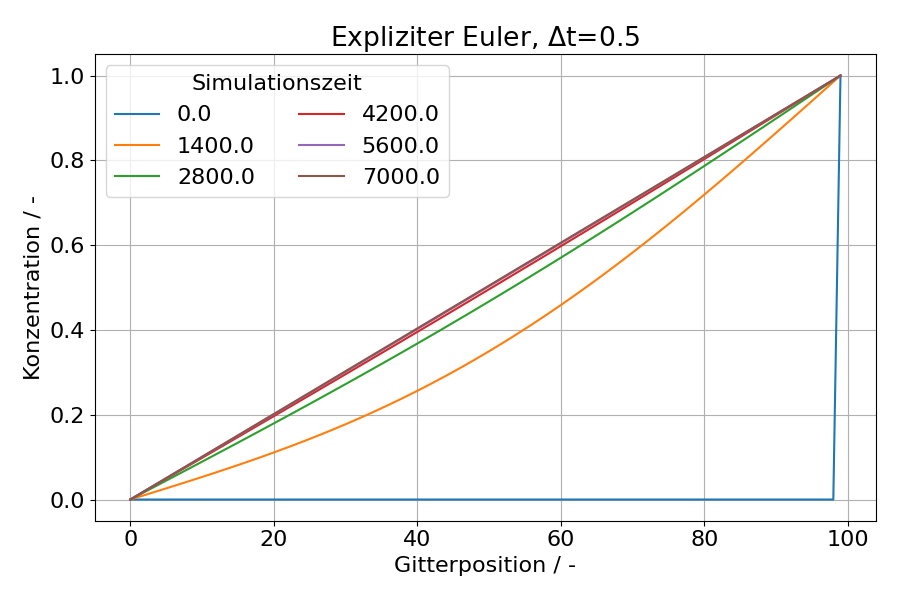

In [49]:
fig_e, ax_e = plt.subplots()
for i in range(len(framelist_e)):
    ax_e.plot(framelist_e[i], label="%.1f" % (times_e[i]))
    
ax_e.set_xlabel("Gitterposition / -")
ax_e.set_ylabel("Konzentration / -")

ax_e.legend(ncol=2,title="Simulationszeit")
ax_e.set_title("Expliziter Euler, $\mathrm{\Delta t}$=%.3g" % (deltat_explicit))
fig_e.tight_layout()
if gridpoints == 50:
    fig_e.savefig("konzentration_dt%2g.pdf" % (deltat_explicit)) 
# Mit Hilfe von fig_e.savefig wird die Ausgabe als PDF-Datei im Notebookordner gespeichert.
# Damit können Sie bequem die Ergebnisse unterschiedlicher Zeitschrittweiten vergleichen, die über die
# Zahl am Ende identifiziert werden.

<h3>2 d) Implizites Eulerverfahren</h3>

Implementieren Sie nun das implizite Eulerverfahren. Es gilt:

$$ \frac{c^{n+1}_{i} - c^{n}_{i}}{\Delta t} = D \frac{c_{i+1}^{n+1} - 2c_{i}^{n+1} + c_{i-1}^{n+1}}{\Delta x^2}$$

Bestimmen Sie zunächst die Matrix $A$ in

$$ A \vec{c}^{n+1} = \vec{c}^{n}  $$

wobei die Vektoren $\vec{c}$ das eindimensionale Konzentrationsfeld zu den Zeitschritten $n$ und $n+1$ darstellen. Sie können die Struktur der Matrix $A$ aus einem Beispiel mit 3 Feldpunkten (inklusive Rändern) bestimmen.


In [72]:
# Zeitschrittweite und charakteristische Zahl des Problems für das implizite Verfahren
deltat_implicit = 0.5 
deltat_implicit = dtis[2] # Für Aufgabe 2f) bietet sich das Setzen des Zeitschritts hiermit an.
alpha = D*deltat_implicit / (deltax**2)

In [73]:
# Berechnung der inneren Zellen
A = np.zeros([gridpoints, gridpoints])
for i in range(1,gridpoints-1):
    A[i, i] = \
    1 + 2*alpha 
    A[i, i - 1] = \
    -alpha 
    A[i, i + 1] = \
    -alpha 
# Fixe Dirichlet-Randbedingungen werden direkt in der Matrix abgebildet
A[0,0]=1
A[-1, -1]=1

Wie berechnet sich nun der neue Zeitschritt?

In [74]:
Ainv=np.linalg.inv(A)
# Zeitintegration mit dem implizitem Eulerverfahren
# Die Lösung x eines linearen Gleichungssystem Ax=b lässt sich mit np.linalg.solve(A, b) bestimmen.
# Alternativ lässt sich die Inverse in diesem Fall vor der Funktion berechnen mit Ainv=np.linalg.inv(A)
# und der neue Zeitschritt über Matrixmultiplikation (np.matmul(Matrix, Vektor)) bestimmen.
#@jit
def implEuler2Ord(cold, cnew):
    cnew[:] = \
    np.linalg.solve(A, cold) 
    #np.matmul(Ainv, cold) 

<h3> 2 e) Simulation und Analyse </h3>

Lösen sie nun die Gleichung numerisch für eine Zeitschrittweite von $\Delta t=0.5$. Unterscheidet sich die Lösung von der des expliziten Verfahrens mit selber Zeitschrittweite? Wie verhält sich die Lösung bei größeren Zeitschrittweiten? Vergleichen und erklären Sie die Unterschiede zum expliziten Verfahren bei $\Delta t > 0.5$.

Bei gleicher Zeitschrittweite gibt es keinen visuellen Unterschied zwischen den Verfahren. 

Das implizite Verfahren bleibt auch bei $\Delta t > 0.5$ stabil, da es unbedingt stabil ist, vgl. https://de.wikipedia.org/wiki/Implizites_Euler-Verfahren . 

In [83]:
#Initialisieren der Felder
cold = np.zeros(gridpoints)
cnew = np.zeros_like(cold)
#ini(cold)
ini(cold)
bcs(cold) # die Randbedingungen müssen initial auf das Feld aufgeprägt werden
framelist_i=[]
times_i=[]
t=0

In [84]:
#Simulation
goaltime=0.7*gridpoints**2
timesteps=int(goaltime/deltat_implicit)
print("Zielzeit ist %lf" % (goaltime))
writefreq=int(timesteps/5)

start=time.time()
for i in range(timesteps+1):
    if i%writefreq == 0:
        framelist_i.append(cold.copy())
        times_i.append(t)
    implEuler2Ord(cold, cnew)
    cold, cnew = cnew, cold
    t = t + deltat_implicit
framelist_e.append(cold.copy())
times_e.append(t)
end = time.time()
print("Laufzeit: %f Sekunden" % (end-start))
if gridpoints == 100:
    runtime_impl[deltat_implicit].append(end-start)

Zielzeit ist 7000.000000
Laufzeit: 0.038337 Sekunden


In [85]:
deltat_implicit

<IPython.core.display.Javascript object>


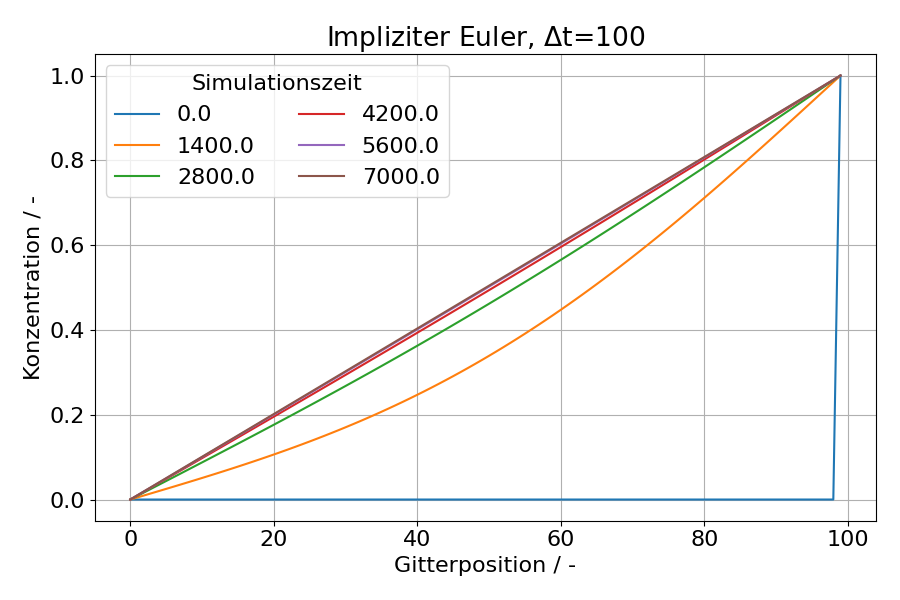

In [86]:
fig_i, ax_i = plt.subplots()
for i in range(len(framelist_i)):
    ax_i.plot(framelist_i[i], label="%.1f" % (times_i[i]))

ax_i.set_xlabel("Gitterposition / -")
ax_i.set_ylabel("Konzentration / -")
ax_i.legend(ncol=2,title="Simulationszeit")
ax_i.set_title("Impliziter Euler, $\mathrm{\Delta t}$=%.3g" % (deltat_implicit))
fig_i.tight_layout()
if gridpoints == 50:
    fig_i.savefig("konzentration-implizit_dt%2g.pdf" % (deltat_implicit) )

<h3> 2 f) Vergleich der Verfahren </h3>

Es soll die Laufzeit der Verfahren für unterschiedliche sinnvolle Zeitschrittweiten verglichen werden. Erhöhen Sie dafür zuerst die Zahl der Gitterpunkte (`gridpoints`) auf 100. Für das explizite Verfahren soll die Zeitschrittweite $\Delta t = 0.5$ verwendet werden, während für das implizite Verfahren die Zeitschrittweiten $\Delta t \in  \{0.5, 10, 100\}$ (`deltat_implicit`) verwendet werden sollen.

Wie beeinflusst der @jit-Dekorator die Laufzeit der Verfahren? Entfernen Sie hierzu die '#' an den entsprechenden Funktionsdefinition vor dem @jit und führen Sie die Simulationen erneut aus.

Diskutieren Sie die Vor- und Nachteile der Verfahren. Was fehlt in einer Betrachtung, die nur die Laufzeit beachtet?

Die Laufzeiten werden mit `gridpoints = 100` automatisch in den Variablen `runtime_expl, runtime_expl_jit` und `runtime_impl` abgespeichert, wo diese über den verwendeten Zeitschritt zugänglich sind, wie in der Zelle hierunter gezeigt.

Der @jit-Dekorator hat praktisch keinen Einfluss auf das implizite Verfahren, da die rechenintensive Operation externalisiert wurde --- beim expliziten Verfahren hingegen wird die Lösung wesentlich schneller berechnet. Bei Funktionen mit dem @jit-Dekorator wird der Inhalt der Funktion von python zu Maschinencode kompiliert bevor er ausgeführt wird, sodass die Geschwindigkeit wesentlich erhöht wird. Wenn der innere Code aber nicht zur Verfügung steht bzw. vom numba-Paket nicht unterstützt wird, kann damit kaum etwas gewonnen werden. 

Im Vergleich zum expliziten Verfahren ohne den @jit-Dekorator hat das implizite Verfahren die geringere Laufzeit sofern eine ausreichend große Zeitschrittweite benutzt wird. Weiterhin ist die direkte Matrixmultiplikation wesentlich schneller als das Lösen des Gleichungssystems. 

Bei komplexeren Problemen wäre die Matrix M jedoch in jedem Zeitschritt neu zu berechnen bzw. in eine sogenannte matrixfreie Methode zu überführen und das Gleichungssystem nur noch mit Näherungsmethoden lösbar, während das explizite Verfahren immer noch vergleichsweise einfach zu implementieren ist. 

Neben der Laufzeit sollte der numerische Fehler ebenso untersucht werden, da ohne den Fehler keine Aussage über die Qualität der Lösung gemacht werden kann. Ein besseres Kriterium zur Wahl eines Verfahrens wäre das Produkt des Fehlers und der Laufzeit zu betrachten oder den Fehler über die Laufzeit zu betrachten. 

<IPython.core.display.Javascript object>


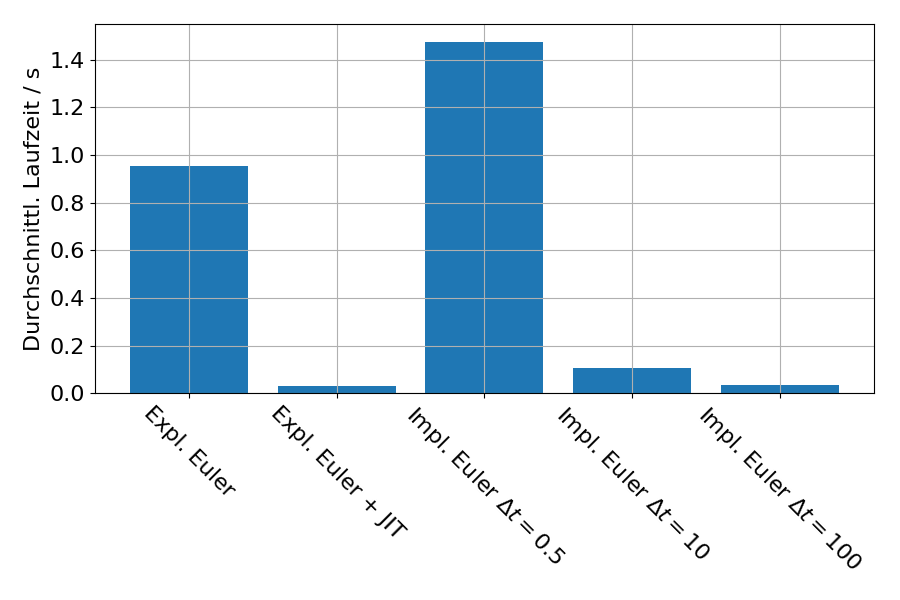

In [91]:
names = ["Expl. Euler", "Expl. Euler + JIT"]
[names.append(x) for x in ["Impl. Euler $\Delta t=%.3g$" % (k)  for k in runtime_impl.keys()]]
dats = [np.average(runtime_expl[0.5]), np.average(runtime_expl_jit[0.5])]
[dats.append(np.average(x)) for x in runtime_impl.values()]

fig, ax = plt.subplots()
xx = np.arange(len(names))
ax.bar(xx, dats)
ax.set_xticks(xx)
ax.set_xticklabels(names, rotation=-45)
ax.set_ylabel("Durchschnittl. Laufzeit / s")
fig.tight_layout()
fig.savefig("laufzeiten.pdf", bbox_inches="tight") 

<IPython.core.display.Javascript object>


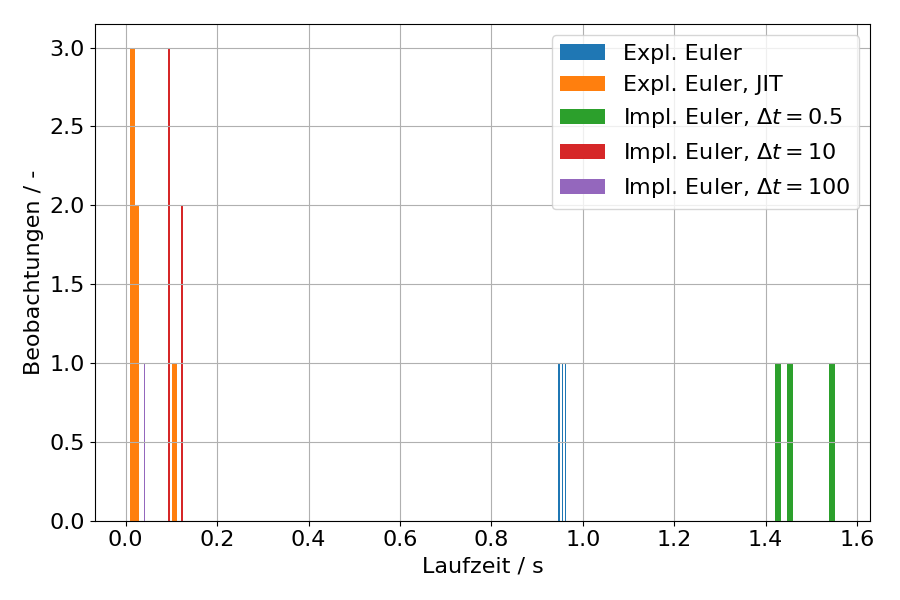

Expl. Euler ohne JIT: 0.953
Expl. Euler mit JIT: 0.0308
Impl. Euler $\Delta t=0.5$: 1.48
Impl. Euler $\Delta t=10$: 0.106
Impl. Euler $\Delta t=100$: 0.0373


In [88]:
## Alternative Betrachtungsweise mit Histogrammen, dank unterschiedlichen Skalen aber z.T. schwer lesbar.
fig, ax = plt.subplots()
ax.hist(runtime_expl[0.5], label="Expl. Euler")
print("Expl. Euler ohne JIT: %.3g" % (np.average(runtime_expl[0.5])))
ax.hist(runtime_expl_jit[0.5], label="Expl. Euler, JIT")
print("Expl. Euler mit JIT: %.3g" % (np.average(runtime_expl_jit[0.5])))
for k, v in runtime_impl.items():
    ax.hist(v, label = "Impl. Euler, $\Delta t=%.3g$" % (k))
    print(r"Impl. Euler $\Delta t=%.3g$: %.3g" % ( k, np.average(runtime_impl[k])))
ax.set_xlabel("Laufzeit / s")
ax.set_ylabel("Beobachtungen / -")
ax.legend()
fig.tight_layout()